## Hệ số hồi quy bị ảnh hưởng bới điều chuẩn

Như chúng ta đã đề cập, điều chuẩn áp dụng penalty đối với các hệ số để giảm ảnh hưởng của chúng và tạo ra các mô hình tổng quát hóa tốt hơn. Điều này cải thiện chất lượng mô hình khá tốt. Tuy nhiên, nó che giấu mối quan hệ thực sự giữa yếu tố dự đoán X và kết quả Y. Hãy cùng khám phá lý do tại sao.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [3]:
# load tập dữ liệu
data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Bai tap lap/Mon_hoc_2/house-price/houseprice.csv')
data = data[data.columns[data.dtypes != 'object']]
data = data.dropna()
data.shape

(1121, 38)

In [4]:
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [5]:
# chia thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((784, 37), (337, 37))

Hãy khớp một vài mô hình hồi quy logistic với các giá trị cho penalty của điều chuẩn.

In [34]:
from sklearn.preprocessing import normalize

In [35]:
norm = normalize()
scaler = StandardScaler()
scaler.fit(X_train)
temp = scaler.transform(X_train)
norm.fit(temp)
# huấn luyện 4 mô hình khác nhau, giảm lượng
# điều chuẩn (là tăng C)

# ở đây chúng ta sẽ lưu trữ các hệ số của biến
# khớp cho từng mô hình khác nhau
coefs_df = []

## Yêu cầu 1
# huấn luyện 5 mô hình khác nhau với điều chuẩn
penalties = [0.005, 0.05, 0.5, 5, 50]

for c in penalties:
    ## VIẾT CODE Ở ĐÂY:
    logit = Ridge(alpha=c, random_state=10, max_iter=300)
    logit.fit(norm.transform(temp), y_train)

    # lưu trữ các hệ số của biến của biến trong một list
    coefs_df.append(pd.Series(logit.coef_.ravel()))

TypeError: ignored

In [30]:
print(coefs_df)

[0         0.610779
1      -134.394811
2       148.438222
3         0.495207
4     16108.465526
5      4549.141460
6       279.745444
7       168.500269
8        25.857977
9        22.001092
10       -5.007320
11        3.666367
12       20.658889
13       13.274413
14       22.959924
15       -2.806084
16       33.427373
17     2916.989534
18     6263.074002
19     2609.385001
20    -3030.289237
21   -12407.011534
22   -27516.744874
23     5344.430715
24     3397.158054
25        9.452848
26     8302.231133
27       22.129511
28       17.932761
29       -8.384195
30      -19.742193
31        8.064505
32       60.634864
33       94.852557
34       -1.767273
35     -659.077928
36     -607.995822
dtype: float64, 0         0.611769
1      -134.477774
2       148.446130
3         0.495096
4     16110.332637
5      4549.591041
6       279.801633
7       168.634720
8        25.860660
9        22.003117
10       -5.003662
11        3.664226
12       20.663524
13       13.264561
14       22.96

<details><summary> Gợi ý </summary>

[LogisticRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

</details>

In [31]:
## Yêu cầu 2
# bây giờ tạo một dataframe với các hệ số cho tất cả
# các biến cho 4 mô hình hồi quy logistic khác nhau

## VIẾT CODE Ở ĐÂY:
coefs = pd.concat([coefs_df[0], coefs_df[1], coefs_df[2],coefs_df[3], coefs_df[4]], axis=1)
coefs.columns = penalties
coefs.index = X_train.columns
coefs.head()

,0.005,0.050,0.500,5.000,50.000
Id,0.610779,0.611769,0.621362,0.692976,0.729138
MSSubClass,-134.394811,-134.477774,-135.284117,-141.511023,-154.619520
LotFrontage,148.438222,148.446130,148.522807,149.094448,148.888413
LotArea,0.495207,0.495096,0.494015,0.485562,0.466306
OverallQual,16108.465526,16110.332637,16128.231758,16246.139265,15772.579730


<details><summary> Gợi ý </summary>

[concat()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)

</details>

In [32]:
# áp dụng thang đo log cho penalties (đơn giản hóa so sánh)

coefs.columns = np.log(penalties)
coefs.head()

,-5.298317,-2.995732,-0.693147,1.609438,3.912023
Id,0.610779,0.611769,0.621362,0.692976,0.729138
MSSubClass,-134.394811,-134.477774,-135.284117,-141.511023,-154.619520
LotFrontage,148.438222,148.446130,148.522807,149.094448,148.888413
LotArea,0.495207,0.495096,0.494015,0.485562,0.466306
OverallQual,16108.465526,16110.332637,16128.231758,16246.139265,15772.579730


Text(0.5, 1.0, 'Coefficient value vs penalty. Each line corresponds to one variable')

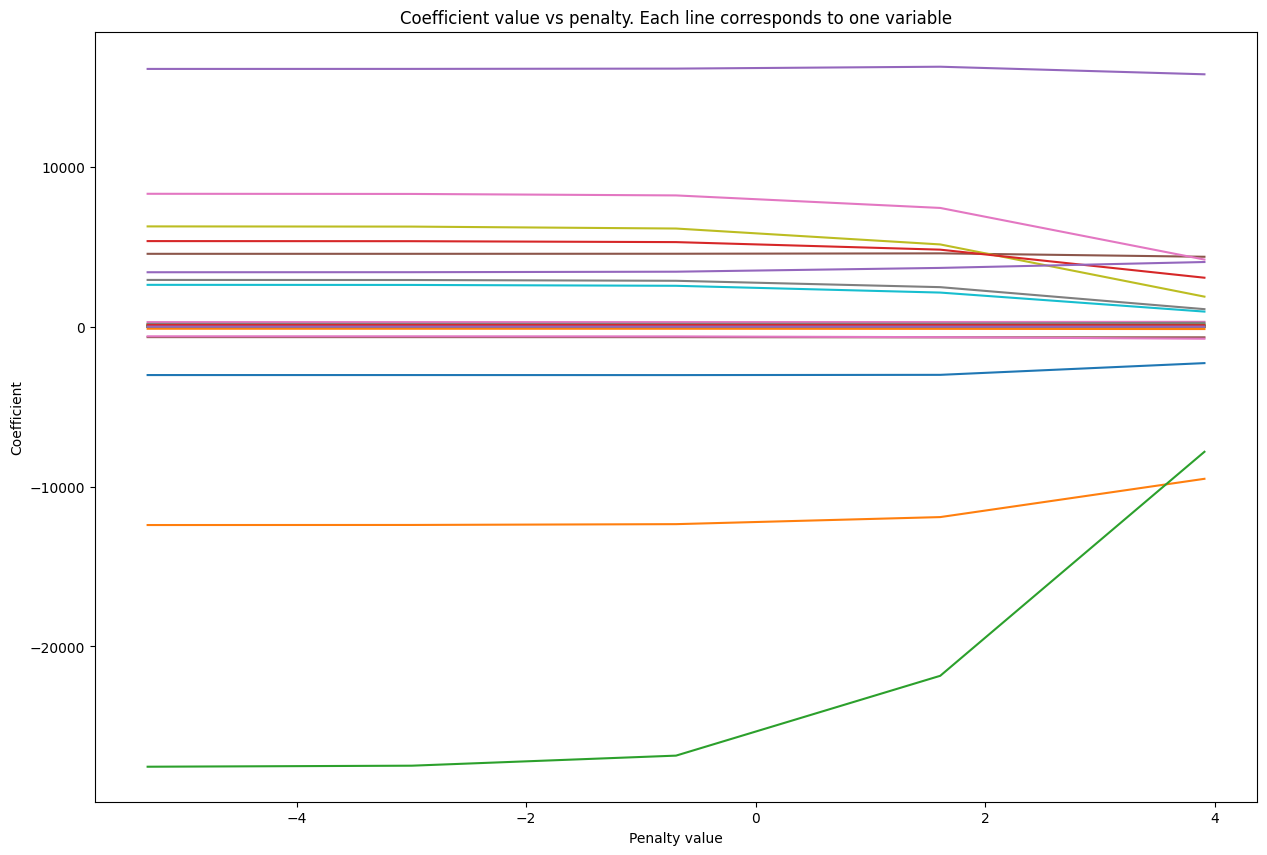

In [33]:
## Yêu cầu 3
# vẽ biểu đồ thay đổi của các hệ số với penalty
## VIẾT CODE Ở ĐÂY:
coefs.T.plot(figsize=(15,10), legend=False)
plt.xlabel('Penalty value')
plt.ylabel('Coefficient')
plt.title('Coefficient value vs penalty. Each line corresponds to one variable')

Text(0.5, 1.0, 'Coefficient value vs penalty')

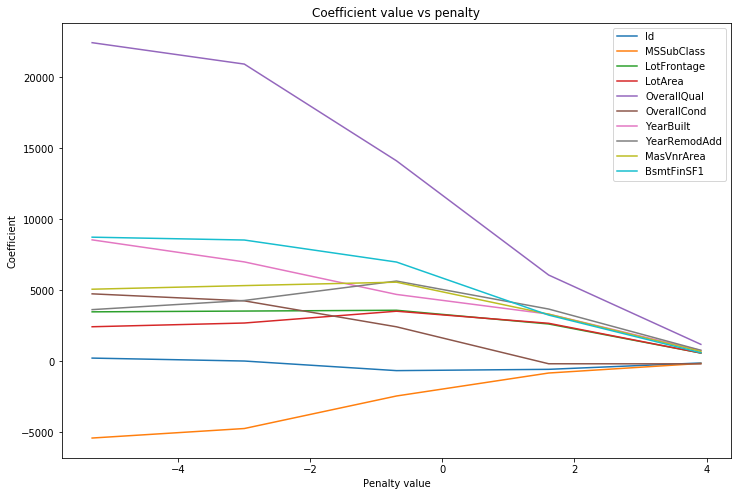

In [ ]:
## Yêu cầu 4
# vẽ biểu đồ chỉ có 10 đặc trưng để
# hiển thị tốt hơn

temp = coefs.head(10)
temp = temp.T
## VIẾT CODE Ở ĐÂY:
...(figsize=(12,8))
plt.xlabel('Penalty value')
plt.ylabel('Coefficient')
plt.title('Coefficient value vs penalty')

Chúng ta có thể thấy mối quan hệ phức tạp giữa các hệ số. Một số đặc trưng hiển thị hệ số lớn hơn những đặc trưng khác mà không cần điều chuẩn, nhưng khi penalty tăng thì mối quan hệ này lại thay đổi.

Một số đặc trưng khác rất quan trọng (hiển thị các hệ số lớn) mà không cần điều chuẩn, nhưng có điều chuẩn thì chúng cũng có mức độ quan trọng giống các đặc trưng khác.

Mặc dù điều này không quan trọng đối với việc lựa chọn đặc trưng nhưng lại khá quan trọng nếu mục đích của chúng ta là hiểu mối quan hệ thực sự của biến với mục tiêu, hay nói cách khác là khi chúng ta cần diễn giải và hiểu đầy đủ về kết quả của Hồi quy tuyến tính.

Text(0.5, 1.0, 'Coefficient value vs penalty')

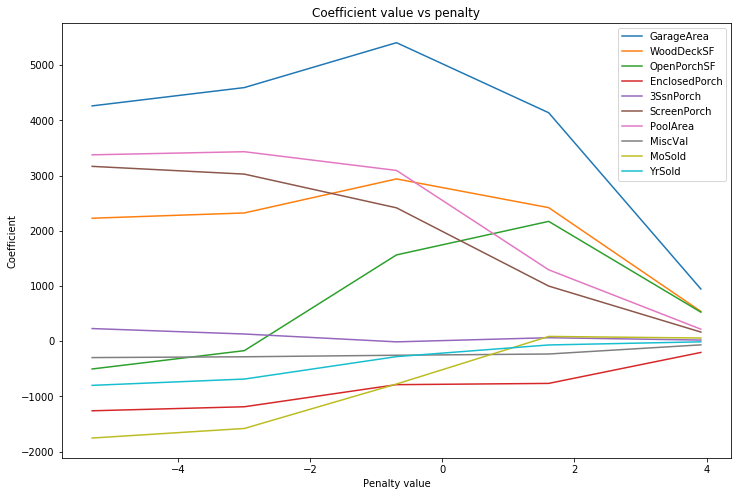

In [ ]:
## Yêu cầu 5
# vẽ biểu đồ có 10 đặc trưng khác để hiển thị
temp = coefs.tail(10)
## VIẾT CODE Ở ĐÂY:
temp = ...
...(figsize=(12,8))
plt.xlabel('Penalty value')
plt.ylabel('Coefficient')
plt.title('Coefficient value vs penalty')

Tương tự như trước, mối quan hệ giữa các đặc trưng khi được suy ra từ các hệ số thay đổi phụ thuộc vào mức độ điều chuẩn.